In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# 파일 경로 설정
base_path = '/content/drive/MyDrive/DeepAI/RPS'#필요시 경로 변경!
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

# 이미지 전처리 및 로드 함수
def load_and_transform_images(base_path):
    categories = ['rock', 'scissors', 'paper']
    images = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            img = Image.open(file_path).convert('RGB')  # 이미지를 RGB로 변환하여 채널 일관성 유지
            img = img.resize((128, 128))  # 모든 이미지를 동일한 크기로 조정
            img = np.array(img) / 255.0  # 이미지를 0-1로 정규화
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# train 및 test 데이터 로드
X_train, y_train = load_and_transform_images(train_path)
X_test, y_test = load_and_transform_images(test_path)

# 데이터 확인
print(f'Number of training images: {len(X_train)}')
print(f'Number of test images: {len(X_test)}')

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


Number of training images: 1950
Number of test images: 270


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(128,128,3))
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same')(inputs)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Flatten()(x)
outputs = layers.Dense(3,activation='softmax')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

callbacks  = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss")
]

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(X_train,y_train)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

61/61 [==============================] - 5s 20ms/step - loss: 1.1728 - accuracy: 0.3554
Epoch 1/20
61/61 [==============================] - 1s 19ms/step - loss: 1.0959 - accuracy: 0.3872 - val_loss: 1.0348 - val_accuracy: 0.4519
Epoch 2/20
61/61 [==============================] - 1s 11ms/step - loss: 0.9938 - accuracy: 0.5036 - val_loss: 0.9814 - val_accuracy: 0.4778
Epoch 3/20
61/61 [==============================] - 1s 12ms/step - loss: 0.8629 - accuracy: 0.6195 - val_loss: 1.1372 - val_accuracy: 0.5000
Epoch 4/20
61/61 [==============================] - 1s 12ms/step - loss: 0.7180 - accuracy: 0.6897 - val_loss: 0.8499 - val_accuracy: 0.6296
Epoch 5/20
61/61 [==============================] - 1s 11ms/step - loss: 0.6220 - accuracy: 0.7349 - val_loss: 0.8420 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 1s 12ms/step - loss: 0.5137 - accuracy: 0.7944 - val_loss: 0.6507 - val_accuracy: 0.7667
Epoch 7/20
61/61 [==============================] - 1s 12ms/step -

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 6ms/step - loss: 0.9772 - accuracy: 0.8148
Test accuracy: 0.8148148059844971


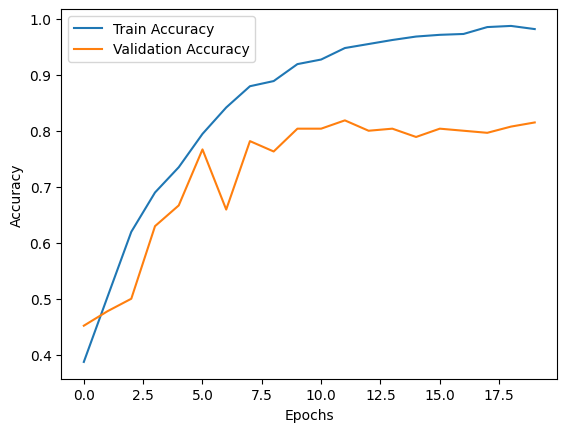

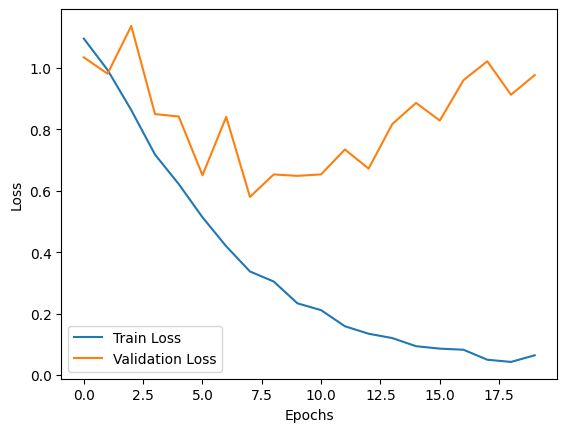

In [ ]:
# 학습 결과 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 초기 Feature Map 출력

1/1 [==============================] - 0s 150ms/step
Processing layer: block1_conv1
Processing layer: block1_conv2
Processing layer: block2_conv1
Processing layer: block2_conv2
Processing layer: block3_conv1
Processing layer: block3_conv2
Processing layer: block3_conv3
Processing layer: block4_conv1
Processing layer: block4_conv2
Processing layer: block4_conv3
Processing layer: block5_conv1
Processing layer: block5_conv2
Processing layer: block5_conv3


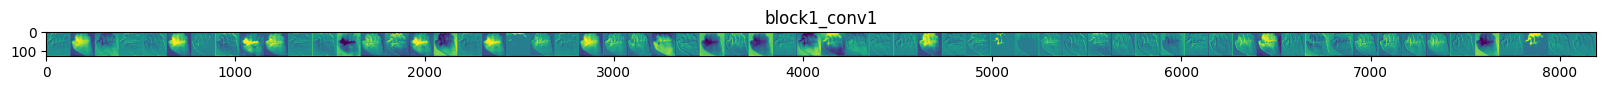

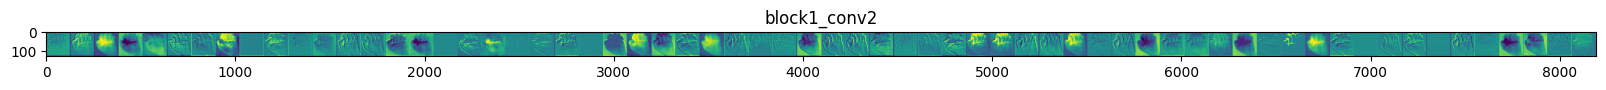

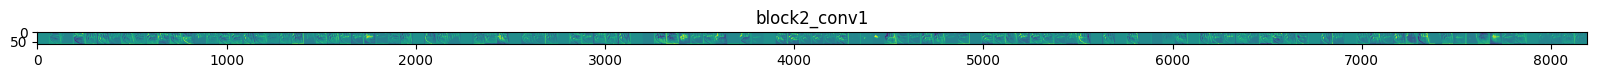

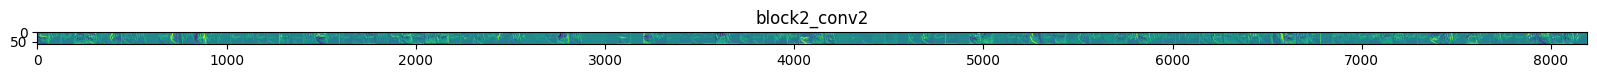

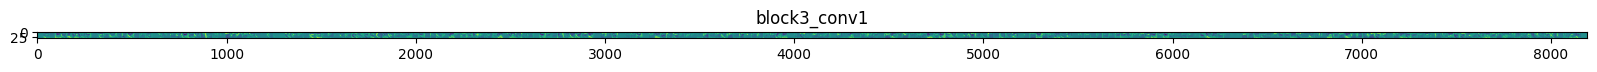

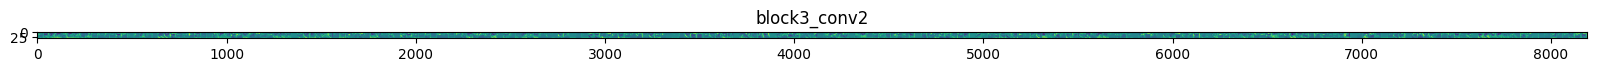

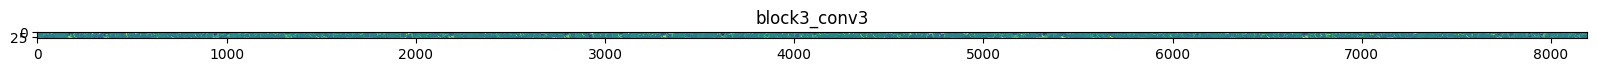

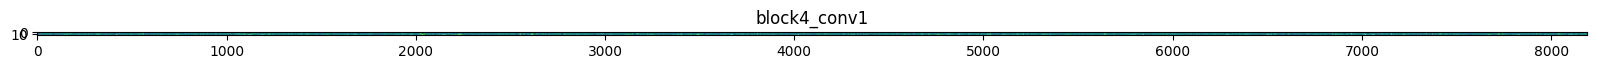

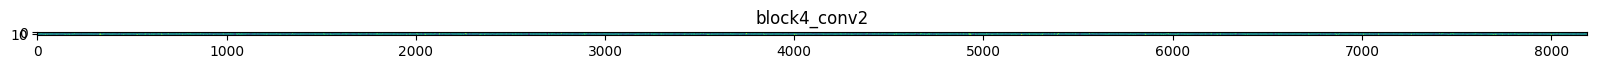

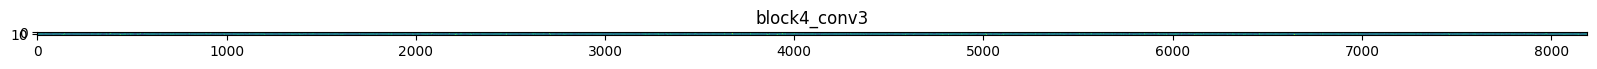

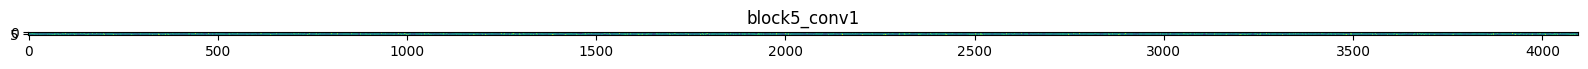

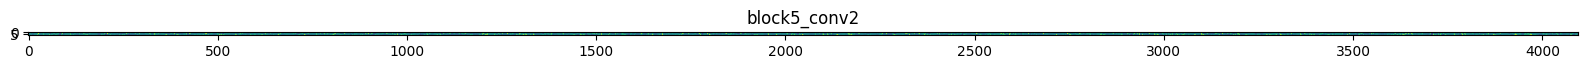

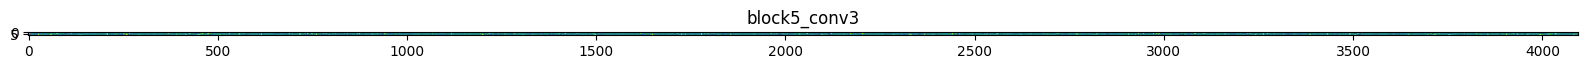

In [ ]:
# Feature Map Visualization
layer_outputs = [layer.output for layer in base_model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

# 특정 이미지를 선택하여 특징 맵을 시각화합니다. 예를 들어, 테스트 셋의 첫 번째 이미지:
img = X_test[0]
img = np.expand_dims(img, axis=0)

# 모델의 중간층 출력을 얻습니다.
feature_maps = activation_model.predict(img)

# 특징 맵 시각화
for layer_name, feature_map in zip([layer.name for layer in base_model.layers if 'conv' in layer.name], feature_maps):
    print(f"Processing layer: {layer_name}")
    size = feature_map.shape[1]
    n_features = feature_map.shape[-1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

## 데이터 증식 사용

In [ ]:
#데이터 증식 사용하기

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)  # 더 깊은 레이어 추가
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # 학습률 조정
              metrics=['accuracy'])


In [ ]:
model.fit(X_train,y_train)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

61/61 [==============================] - 7s 24ms/step - loss: 1.0987 - accuracy: 0.3215
Epoch 1/30
61/61 [==============================] - 1s 21ms/step - loss: 1.0987 - accuracy: 0.3128 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/30
61/61 [==============================] - 1s 13ms/step - loss: 1.0986 - accuracy: 0.3297 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/30
61/61 [==============================] - 1s 14ms/step - loss: 1.0987 - accuracy: 0.3123 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/30
61/61 [==============================] - 1s 14ms/step - loss: 1.0987 - accuracy: 0.3318 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/30
61/61 [==============================] - 1s 13ms/step - loss: 1.0987 - accuracy: 0.3282 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/30
61/61 [==============================] - 1s 13ms/step - loss: 1.0987 - accuracy: 0.3272 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/30
61/61 [==============================] - 1s 14ms/step -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 6ms/step - loss: 1.0986 - accuracy: 0.3333
Test accuracy: 0.3333333432674408


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction",
      save_best_only=True,
      monitor="val_loss")
]

history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),
    callbacks=callbacks)

Epoch 1/20
61/61 [==============================] - 2s 22ms/step - loss: 204.4056 - accuracy: 0.3436 - val_loss: 292.5824 - val_accuracy: 0.3333
Epoch 2/20
61/61 [==============================] - 1s 17ms/step - loss: 135.1291 - accuracy: 0.3436 - val_loss: 91.5208 - val_accuracy: 0.3333
Epoch 3/20
61/61 [==============================] - 1s 17ms/step - loss: 89.7812 - accuracy: 0.3472 - val_loss: 29.1918 - val_accuracy: 0.3296
Epoch 4/20
61/61 [==============================] - 0s 7ms/step - loss: 52.8490 - accuracy: 0.3610 - val_loss: 52.1938 - val_accuracy: 0.3444
Epoch 5/20
61/61 [==============================] - 1s 17ms/step - loss: 29.0131 - accuracy: 0.3436 - val_loss: 6.4551 - val_accuracy: 0.3481
Epoch 6/20
61/61 [==============================] - 1s 17ms/step - loss: 8.8942 - accuracy: 0.3708 - val_loss: 2.1038 - val_accuracy: 0.4111
Epoch 7/20
61/61 [==============================] - 0s 7ms/step - loss: 3.4013 - accuracy: 0.3462 - val_loss: 3.2737 - val_accuracy: 0.3333
Epo

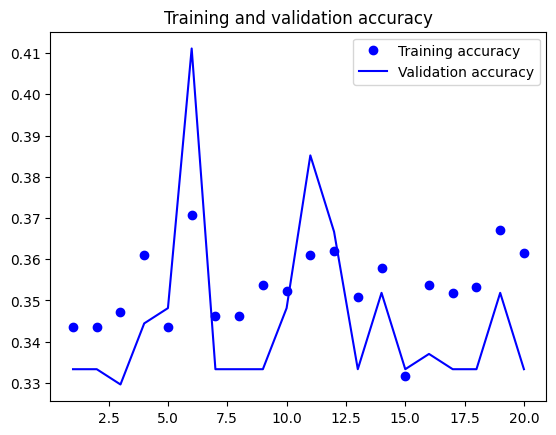

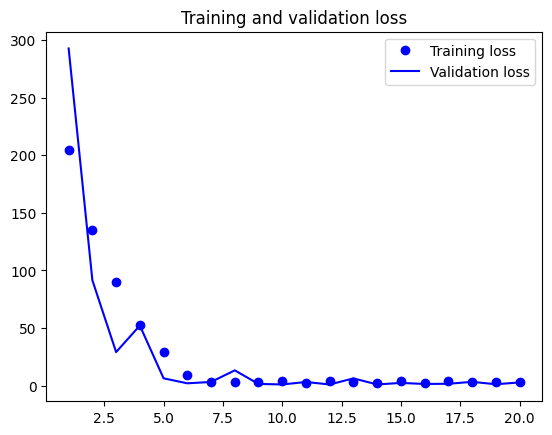

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_acc:.3f}")

9/9 [==============================] - 0s 4ms/step - loss: 1.0916 - accuracy: 0.3667
테스트 정확도: 0.367


## VGG16 합성곱 기반층 사용

In [ ]:
# VGG16합성곱 기반 층 사용

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation",
        save_best_only=True,
        monitor="val_loss")
]
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
    callbacks=callbacks)

Epoch 1/30
61/61 [==============================] - 11s 128ms/step - loss: 12.7520 - accuracy: 0.3405 - val_loss: 2.8017 - val_accuracy: 0.4037
Epoch 2/30
61/61 [==============================] - 2s 35ms/step - loss: 8.6734 - accuracy: 0.3369 - val_loss: 5.4678 - val_accuracy: 0.3444
Epoch 3/30
61/61 [==============================] - 5s 83ms/step - loss: 6.2006 - accuracy: 0.3477 - val_loss: 1.3498 - val_accuracy: 0.3333
Epoch 4/30
61/61 [==============================] - 2s 36ms/step - loss: 4.0270 - accuracy: 0.3467 - val_loss: 1.4022 - val_accuracy: 0.4111
Epoch 5/30
61/61 [==============================] - 2s 36ms/step - loss: 2.2593 - accuracy: 0.3564 - val_loss: 1.5948 - val_accuracy: 0.3333
Epoch 6/30
61/61 [==============================] - 5s 77ms/step - loss: 1.4972 - accuracy: 0.3682 - val_loss: 1.2082 - val_accuracy: 0.3778
Epoch 7/30
61/61 [==============================] - 2s 36ms/step - loss: 1.2235 - accuracy: 0.3472 - val_loss: 1.3899 - val_accuracy: 0.3333
Epoch 8/30

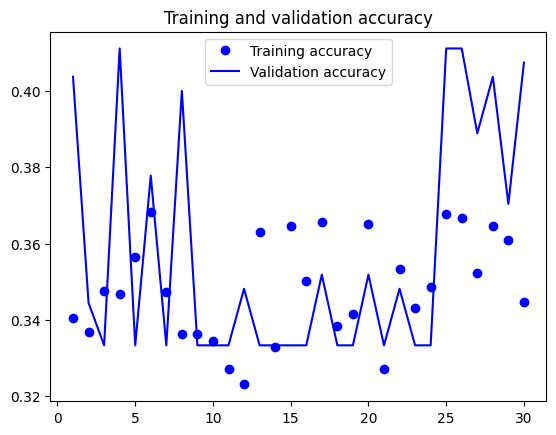

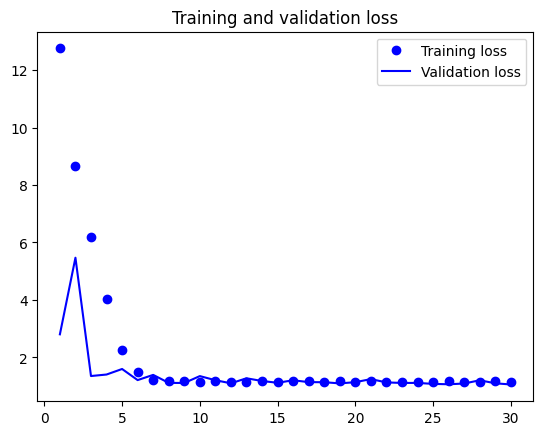

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_acc:.3f}")

9/9 [==============================] - 0s 4ms/step - loss: 1.0916 - accuracy: 0.3667
테스트 정확도: 0.367


## 사전훈련된 모델 사용

In [ ]:
#사전훈련된 모델 사용

base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
    callbacks=callbacks)


Epoch 1/30
61/61 [==============================] - 6s 80ms/step - loss: 1.3078 - accuracy: 0.3656 - val_loss: 0.9687 - val_accuracy: 0.5741
Epoch 2/30
61/61 [==============================] - 5s 82ms/step - loss: 1.0096 - accuracy: 0.4995 - val_loss: 0.8727 - val_accuracy: 0.7778
Epoch 3/30
61/61 [==============================] - 5s 75ms/step - loss: 0.9037 - accuracy: 0.5990 - val_loss: 0.8007 - val_accuracy: 0.8074
Epoch 4/30
61/61 [==============================] - 5s 75ms/step - loss: 0.8277 - accuracy: 0.6667 - val_loss: 0.7453 - val_accuracy: 0.8074
Epoch 5/30
61/61 [==============================] - 5s 82ms/step - loss: 0.7710 - accuracy: 0.7103 - val_loss: 0.6959 - val_accuracy: 0.8444
Epoch 6/30
61/61 [==============================] - 5s 75ms/step - loss: 0.7374 - accuracy: 0.7179 - val_loss: 0.6527 - val_accuracy: 0.8444
Epoch 7/30
61/61 [==============================] - 5s 75ms/step - loss: 0.7172 - accuracy: 0.7267 - val_loss: 0.6250 - val_accuracy: 0.8333
Epoch 8/30
61

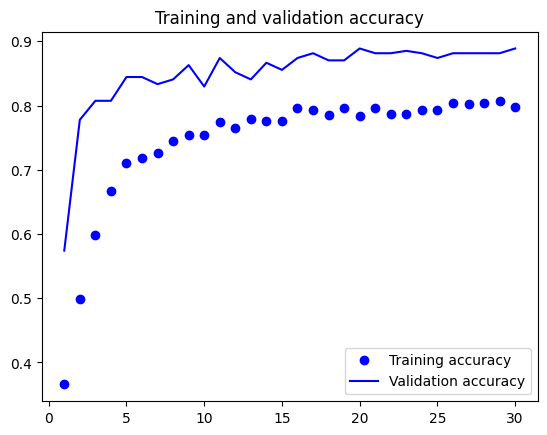

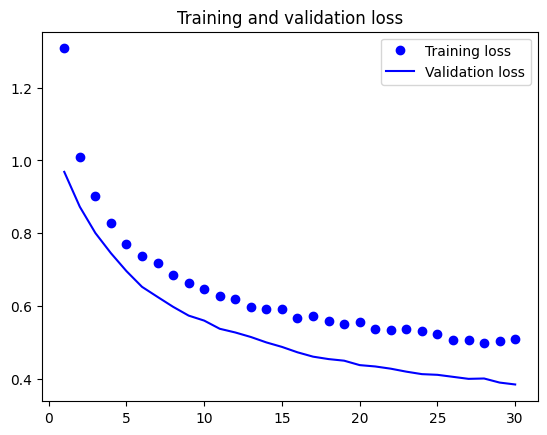

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 29ms/step - loss: 0.3844 - accuracy: 0.8889
Test accuracy: 0.8888888955116272


## 모델 동결 및 미세조정

In [ ]:
#모델 동결 및 미세조정
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning",
        save_best_only=True,
        monitor="val_loss")
]
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
    callbacks=callbacks)

Epoch 1/30
61/61 [==============================] - 6s 80ms/step - loss: 0.5001 - accuracy: 0.8108 - val_loss: 0.3838 - val_accuracy: 0.8852
Epoch 2/30
61/61 [==============================] - 5s 75ms/step - loss: 0.4966 - accuracy: 0.8174 - val_loss: 0.3835 - val_accuracy: 0.8889
Epoch 3/30
61/61 [==============================] - 5s 80ms/step - loss: 0.4985 - accuracy: 0.8138 - val_loss: 0.3833 - val_accuracy: 0.8889
Epoch 4/30
61/61 [==============================] - 5s 75ms/step - loss: 0.5089 - accuracy: 0.7995 - val_loss: 0.3832 - val_accuracy: 0.8852
Epoch 5/30
61/61 [==============================] - 5s 75ms/step - loss: 0.5051 - accuracy: 0.8087 - val_loss: 0.3830 - val_accuracy: 0.8852
Epoch 6/30
61/61 [==============================] - 5s 82ms/step - loss: 0.4832 - accuracy: 0.8174 - val_loss: 0.3829 - val_accuracy: 0.8889
Epoch 7/30
61/61 [==============================] - 5s 76ms/step - loss: 0.4878 - accuracy: 0.8144 - val_loss: 0.3828 - val_accuracy: 0.8889
Epoch 8/30
61

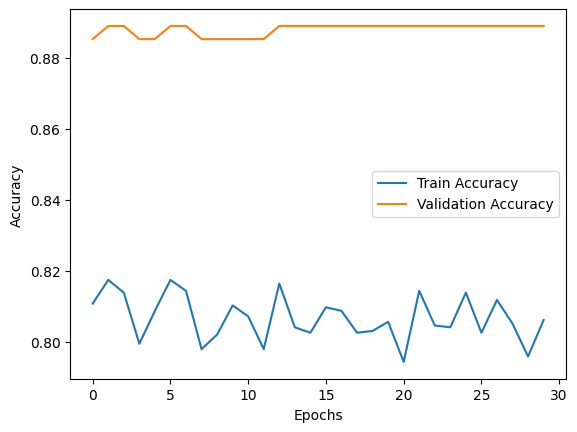

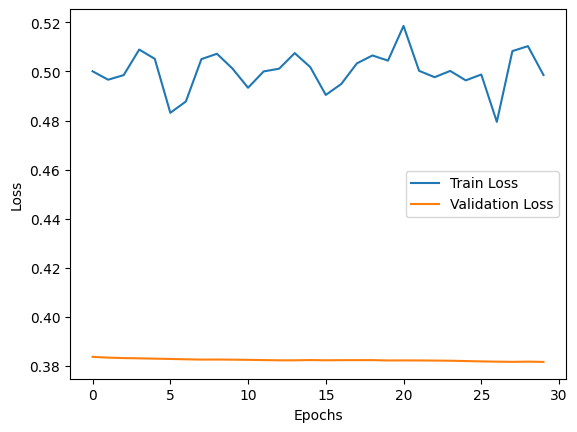

In [ ]:
# 학습 결과 그래프
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 28ms/step - loss: 0.3817 - accuracy: 0.8889
Test accuracy: 0.8888888955116272


## kaggle RPS데이터셋 추가

In [ ]:
import zipfile
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

extract_path = '/content/drive/MyDrive/extracted_data/'

# 추가 데이터 경로 설정
additional_train_path = os.path.join(extract_path, 'Rock-Paper-Scissors/train')
additional_test_path = os.path.join(extract_path, 'Rock-Paper-Scissors/test')

# 추가 데이터 로드
X_train_additional, y_train_additional = load_and_transform_images(additional_train_path)
X_test_additional, y_test_additional = load_and_transform_images(additional_test_path)

# 데이터 형태 확인
print(f'Initial shapes:')
print(f'y_train shape: {y_train.shape}')
print(f'y_train_additional shape: {y_train_additional.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_test_additional shape: {y_test_additional.shape}')

# y_train과 y_train_additional의 형태를 맞추기
if y_train.ndim == 1:
    y_train = to_categorical(y_train, 3)

if y_train_additional.ndim == 1:
    y_train_additional = to_categorical(y_train_additional, 3)

# 동일한 방식으로 y_test와 y_test_additional에도 적용
if y_test.ndim == 1:
    y_test = to_categorical(y_test, 3)

if y_test_additional.ndim == 1:
    y_test_additional = to_categorical(y_test_additional, 3)

# 데이터 형태 확인
print(f'After one-hot encoding:')
print(f'y_train shape: {y_train.shape}')
print(f'y_train_additional shape: {y_train_additional.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_test_additional shape: {y_test_additional.shape}')

# 기존 데이터와 결합
X_train = np.concatenate((X_train, X_train_additional), axis=0)
y_train = np.concatenate((y_train, y_train_additional), axis=0)
X_test = np.concatenate((X_test, X_test_additional), axis=0)
y_test = np.concatenate((y_test, y_test_additional), axis=0)

# 데이터 형태 확인
print(f'Final shapes:')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


Initial shapes:
y_train shape: (1950, 3)
y_train_additional shape: (2520,)
y_test shape: (270, 3)
y_test_additional shape: (372,)
After one-hot encoding:
y_train shape: (1950, 3)
y_train_additional shape: (2520, 3)
y_test shape: (270, 3)
y_test_additional shape: (372, 3)
Final shapes:
X_train shape: (4470, 128, 128, 3)
y_train shape: (4470, 3)
X_test shape: (642, 128, 128, 3)
y_test shape: (642, 3)


In [ ]:
# 데이터 증강
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),
    ]
)

# 사전 훈련된 VGG16 모델 가져오기 및 동결
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # 모든 레이어를 동결

In [ ]:
# 새로운 분류기 레이어 추가
inputs = tf.keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)  # 데이터 증강 적용
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
140/140 [==============================] - 9s 54ms/step - loss: 0.9183 - accuracy: 0.5745 - val_loss: 0.7696 - val_accuracy: 0.6371
Epoch 2/10
140/140 [==============================] - 5s 37ms/step - loss: 0.6237 - accuracy: 0.7857 - val_loss: 0.5776 - val_accuracy: 0.7866
Epoch 3/10
140/140 [==============================] - 5s 37ms/step - loss: 0.4824 - accuracy: 0.8456 - val_loss: 0.4968 - val_accuracy: 0.8037
Epoch 4/10
140/140 [==============================] - 5s 37ms/step - loss: 0.4072 - accuracy: 0.8615 - val_loss: 0.4244 - val_accuracy: 0.8614
Epoch 5/10
140/140 [==============================] - 5s 37ms/step - loss: 0.3596 - accuracy: 0.8770 - val_loss: 0.4237 - val_accuracy: 0.8520
Epoch 6/10
140/140 [==============================] - 5s 37ms/step - loss: 0.3248 - accuracy: 0.8895 - val_loss: 0.3677 - val_accuracy: 0.8660
Epoch 7/10
140/140 [==============================] - 5s 37ms/step - loss: 0.2948 - accuracy: 0.8933 - val_loss: 0.2969 - val_accuracy: 0.9081

In [ ]:
# 마지막 몇 개 레이어 동결 해제
base_model.trainable = True
# 상위 몇 개 레이어를 제외하고 모든 레이어 동결
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 모델 다시 컴파일 (학습률을 낮춤)
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history_fine = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
140/140 [==============================] - 7s 37ms/step - loss: 0.1681 - accuracy: 0.9385 - val_loss: 0.0886 - val_accuracy: 0.9782
Epoch 2/10
140/140 [==============================] - 5s 33ms/step - loss: 0.1076 - accuracy: 0.9600 - val_loss: 0.0839 - val_accuracy: 0.9766
Epoch 3/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0784 - accuracy: 0.9736 - val_loss: 0.0468 - val_accuracy: 0.9829
Epoch 4/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0665 - accuracy: 0.9770 - val_loss: 0.0452 - val_accuracy: 0.9844
Epoch 5/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0580 - accuracy: 0.9779 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 6/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0472 - accuracy: 0.9814 - val_loss: 0.0561 - val_accuracy: 0.9813
Epoch 7/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0414 - accuracy: 0.9861 - val_loss: 0.0246 - val_accuracy: 0.9938

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

21/21 [==============================] - 1s 29ms/step - loss: 0.0228 - accuracy: 0.9922
Test accuracy: 0.9922118186950684


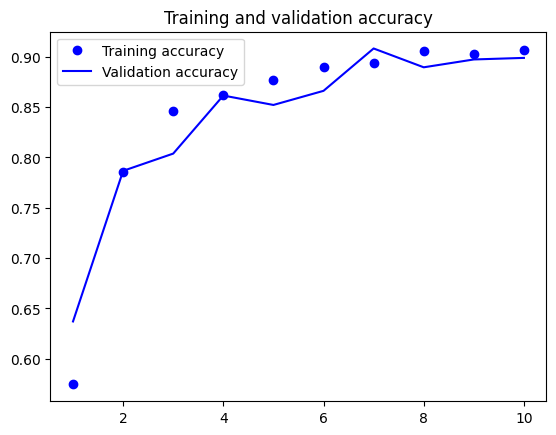

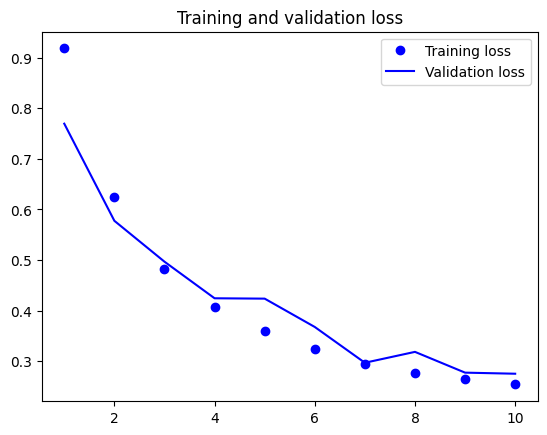

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 성능 평가를 위한 혼동 행렬

21/21 [==============================] - 1s 29ms/step


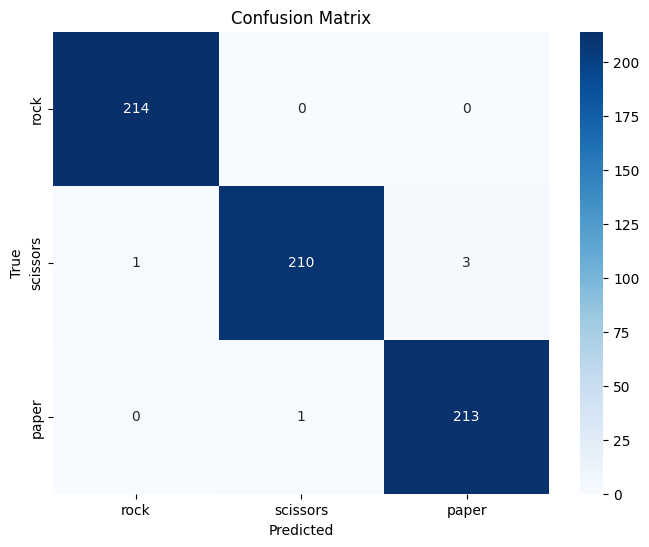

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
# 예측값 얻기
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 혼동 행렬 계산
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_labels = ['rock', 'scissors', 'paper']

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

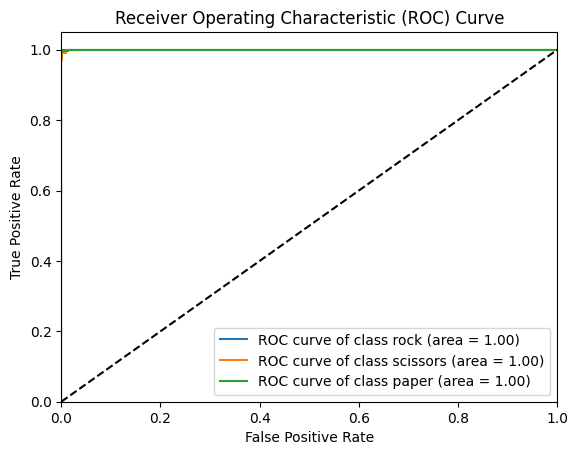

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])

# Plotting ROC Curve
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {cm_labels[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 잘못 예측한 이미지 출력

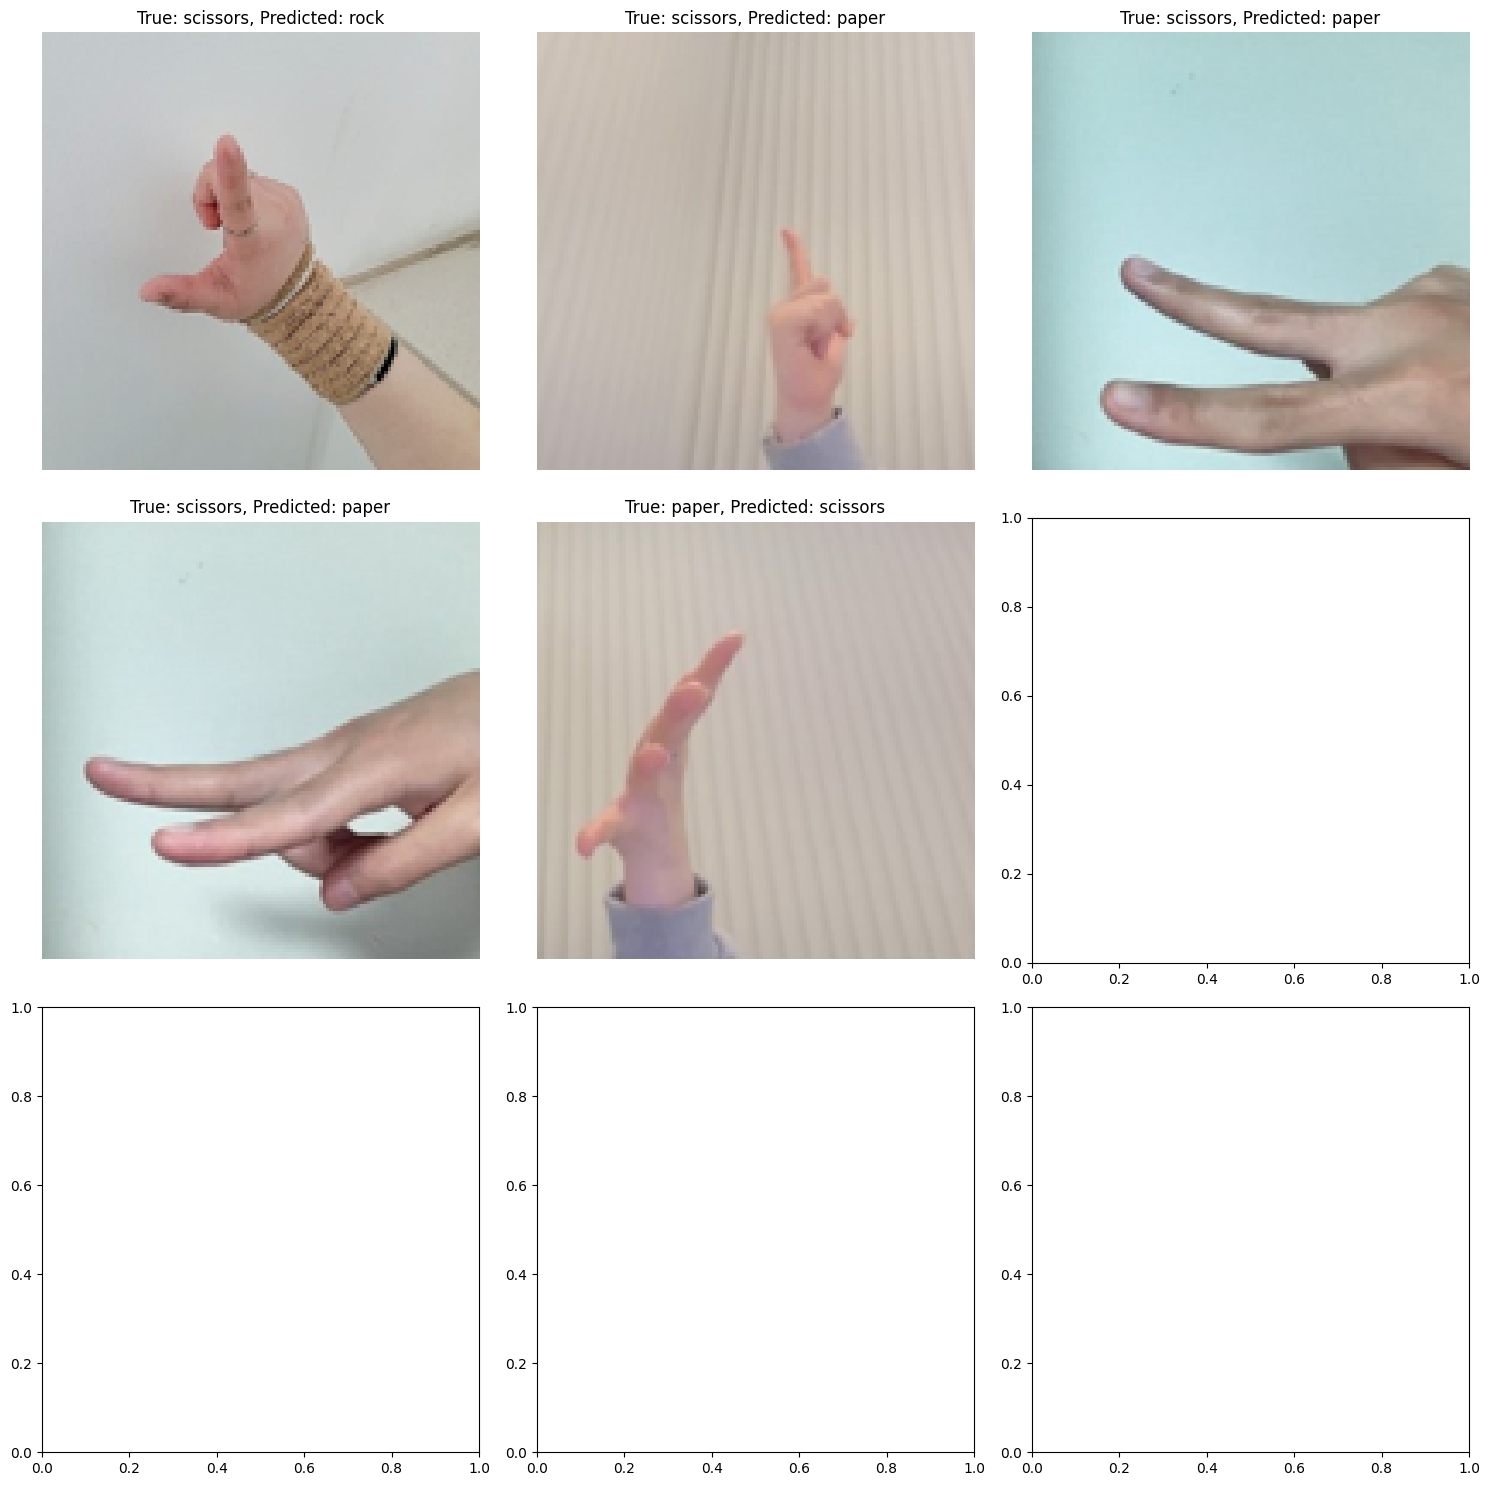

In [ ]:
# 잘못 예측한 이미지 출력
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, idx in zip(axes, incorrect_indices[:9]):  # 처음 9개의 잘못된 예측만 표시
    ax.imshow(X_test[idx])
    ax.set_title(f"True: {cm_labels[y_true_classes[idx]]}, Predicted: {cm_labels[y_pred_classes[idx]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 최종 feature map 출력

1/1 [==============================] - 1s 1s/step
Processing layer: block1_conv1
Processing layer: block1_conv2
Processing layer: block2_conv1
Processing layer: block2_conv2
Processing layer: block3_conv1
Processing layer: block3_conv2
Processing layer: block3_conv3
Processing layer: block4_conv1
Processing layer: block4_conv2
Processing layer: block4_conv3
Processing layer: block5_conv1
Processing layer: block5_conv2
Processing layer: block5_conv3


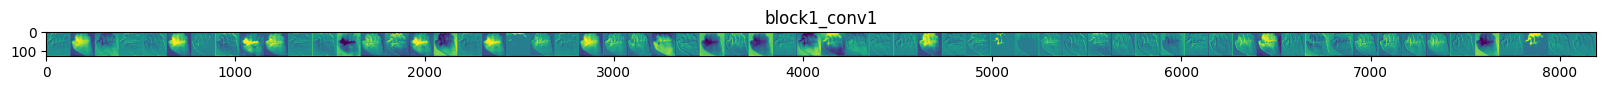

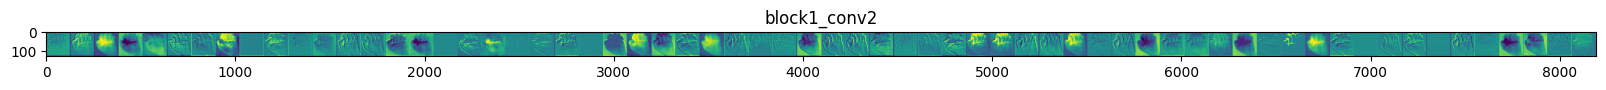

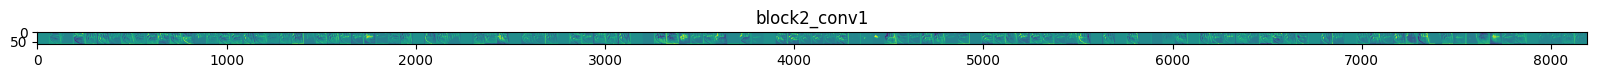

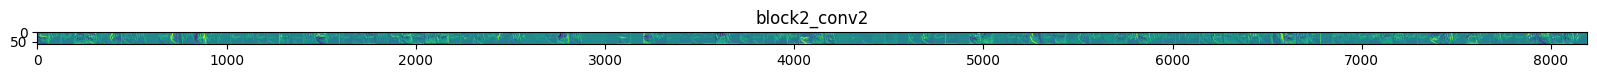

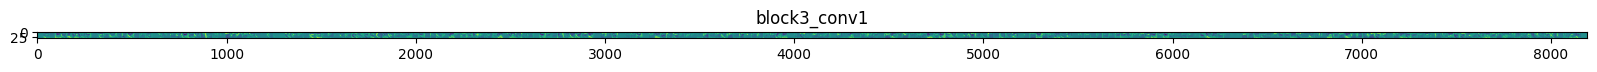

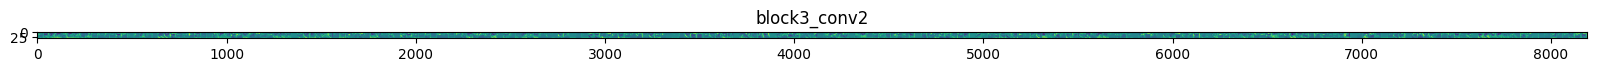

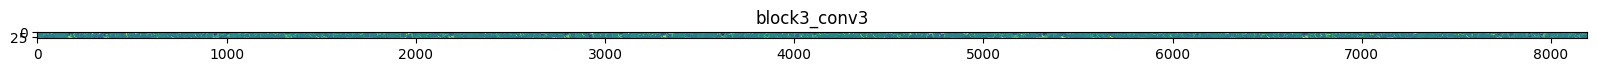

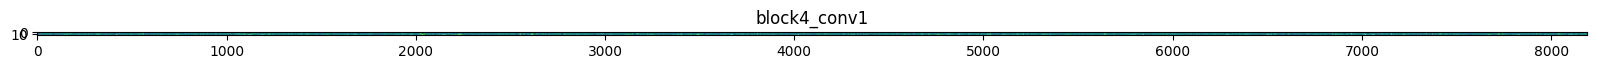

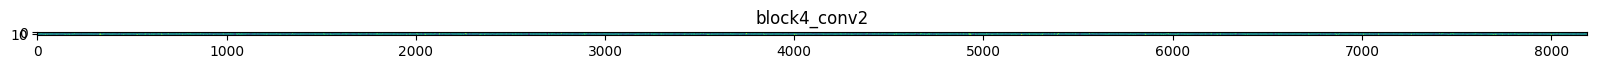

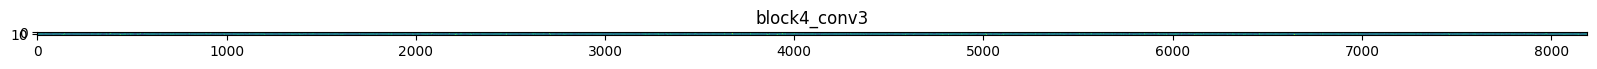

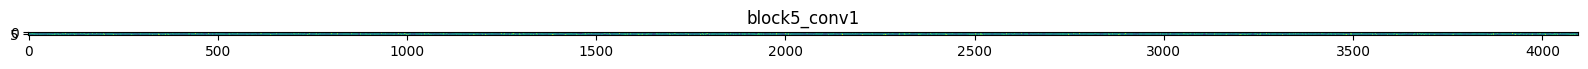

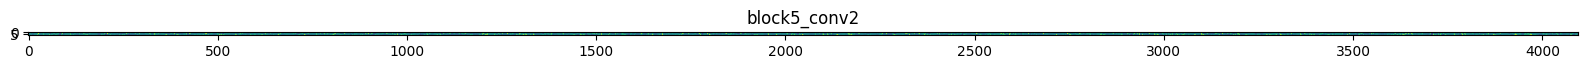

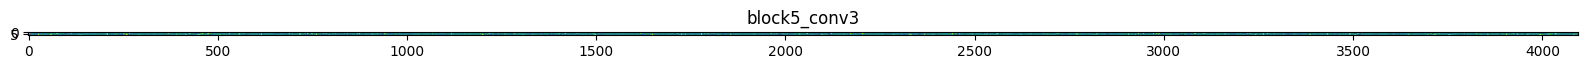

In [ ]:
# Feature Map Visualization
layer_outputs = [layer.output for layer in base_model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

# 특정 이미지를 선택하여 특징 맵을 시각화합니다. 예를 들어, 테스트 셋의 첫 번째 이미지:
img = X_test[0]
img = np.expand_dims(img, axis=0)

# 모델의 중간층 출력을 얻습니다.
feature_maps = activation_model.predict(img)

# 특징 맵 시각화
for layer_name, feature_map in zip([layer.name for layer in base_model.layers if 'conv' in layer.name], feature_maps):
    print(f"Processing layer: {layer_name}")
    size = feature_map.shape[1]
    n_features = feature_map.shape[-1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()